**Table of contents**<a id='toc0_'></a>    
- 1. [select channel](#toc1_)    
- 2. [Function definitions](#toc2_)    
- 3. [load pkl files](#toc3_)    
- 4. [concatenate catalogues](#toc4_)    
- 5. [Exploratory Analysis](#toc5_)    
- 6. [Data Cleaning](#toc6_)    
- 7. [Extract fit_param into dict](#toc7_)    
- 8. [Investigating Paramater distributions](#toc8_)    
  - 8.1. [t0](#toc8_1_)    
  - 8.2. [$\sigma$](#toc8_2_)    
    - 8.2.1. [fitting](#toc8_2_1_)    
  - 8.3. [$\tau$](#toc8_3_)    
  - 8.4. [scale](#toc8_4_)    
- 9. [Cuts:  rectangular cut](#toc9_)    
  - 9.1. [$ \sigma$](#toc9_1_)    
    - 9.1.1. [fitting](#toc9_1_1_)    
  - 9.2. [$\tau$](#toc9_2_)    
    - 9.2.1. [fitting](#toc9_2_1_)    
    - 9.2.2. [Fitting with iMinuit](#toc9_2_2_)    
  - 9.3. [scale](#toc9_3_)    
    - 9.3.1. [fitting](#toc9_3_1_)    
- 10. [FingerPlot](#toc10_)    
- 11. [fit gaussian to finger](#toc11_)    
  - 11.1. [First finger](#toc11_1_)    
  - 11.2. [Second finger](#toc11_2_)    
- 12. [SPE charge](#toc12_)    
- 13. [SNR](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import pickle
import matplotlib.pyplot as plt
from matplotlib import legend
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as patches
import matplotlib.offsetbox as offsetbox
import matplotlib as mpl

In [2]:
mpl.rcParams['axes.labelsize'] = 14

In [3]:
from matplotlib import rc

In [4]:
rc('figure', autolayout=True, dpi=125, titlesize=20 )
rc('font', family='monospace')
rc('axes', titlesize=20, titleweight='heavy', labelsize=16, labelweight='bold')
rc(('xtick', 'ytick'), labelsize = 18)
rc('legend', fontsize=14)

In [5]:
np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [6]:
%matplotlib ipympl

# 1. <a id='toc1_'></a>[select channel](#toc0_)

Which channel?

In [7]:
ch_str_ls = ['ch0', 'ch1', 'ch2']

# selected_channel =  input("Choose channel number for processing.")
# selected_channel = 0
selected_channel = 2
print(f"selected channel index: {selected_channel}")
ch_x = ch_str_ls[int(selected_channel)]

selected channel index: 2


# 2. <a id='toc2_'></a>[Function definitions](#toc0_)

In [8]:
def f_gauss(x, g_mean, g_sigma, g_k):
    return g_k*(1/(g_sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-g_mean)/g_sigma)**2)

In [9]:
def red_chisq(f_obs, f_exp, fittedparameters):
    chisqr = np.sum((f_obs - f_exp)**2 / f_exp)
    ndf = f_obs.shape[0]
    return chisqr/(ndf -fittedparameters.shape[0])

# 3. <a id='toc3_'></a>[load pkl files](#toc0_)

In [10]:
# all_clean_catalogues = []
# for run_number in run_number_ls:
#     all_clean_catalogues.append(f'clean_catalogue_run000{run_number}.pkl')

In [11]:
# selected_clean_catalogue_path = os.path.join(output_folder, all_clean_catalogues[3])
# selected_clean_dict = pickle.load(open(selected_fit_catalogue_path, 'rb'))
# selected_clean_dict #['ch2']

In [12]:
# output_folder = '/home/sarthak/my_projects/argset/output_folder/'
output_folder = '/work/chuck/sarthak/argset/output_folder'
# output_folder = '/work/sarthak/argset/processed_data/backup_ch2/'
# output_folder = '/work/sarthak/argset/processed_data/backup/'
# output_folder = '/work/chuck/sarthak/argset/backup_default_ARMA/output_folder/'

In [13]:
run_number_ls = [52, 53, 54, 61, 62, 63]
# run_number_ls = [52, 61]
# run_number_ls = [52]

In [14]:
all_fit_catalogues = []
for run_number in run_number_ls:
    # all_fit_catalogues.append(f'{output_folder}/fit_catalogue_run000{run_number}.pkl')
    # all_fit_catalogues.append(f'{output_folder}/fit_catalogue_custom_run000{run_number}.pkl')
    all_fit_catalogues.append(f'{output_folder}/fit_catalogue_filteredWF_run000{run_number}.pkl')

In [15]:
all_fit_catalogues

['/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00052.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00053.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00054.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00061.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00062.pkl',
 '/work/chuck/sarthak/argset/output_folder/fit_catalogue_filteredWF_run00063.pkl']

In [16]:
fit_dict_52 = pickle.load(open( all_fit_catalogues[0], 'rb'))

In [17]:
fit_dict_53 = pickle.load(open( all_fit_catalogues[1], 'rb'))

In [18]:
fit_dict_54 = pickle.load(open( all_fit_catalogues[2], 'rb'))

In [19]:
fit_dict_61 = pickle.load(open( all_fit_catalogues[3], 'rb'))

In [20]:
fit_dict_62 = pickle.load(open( all_fit_catalogues[4], 'rb'))

In [21]:
fit_dict_63 = pickle.load(open( all_fit_catalogues[4], 'rb'))

# 4. <a id='toc4_'></a>[concatenate catalogues](#toc0_)

In [22]:
fit_dict_ls = [fit_dict_52, fit_dict_53, fit_dict_54, fit_dict_61, fit_dict_62, fit_dict_63]
# fit_dict_ls = [fit_dict_52, fit_dict_53, fit_dict_54]
# fit_dict_ls = [fit_dict_61, fit_dict_62, fit_dict_63]
# fit_dict_ls = [fit_dict_52]
# ch_str_ls = ['ch0', 'ch1', 'ch2'] # original
ch_str_ls = [['ch0', 'ch1', 'ch2'][selected_channel]]
# ch_str_ls = ['ch2']

fit_catalogue = {}
# for ch_x in ch_str_ls: # original
for ch_x in ch_str_ls:
    fit_catalogue_x = []
    for fit_dict in fit_dict_ls:
        fit_catalogue_x.append(fit_dict[ch_x])
    fit_catalogue[ch_x] = pd.concat(fit_catalogue_x, ignore_index=True)

KeyError: 'ch2'

Free up RAM

In [ ]:
del fit_dict_53, fit_dict_54, fit_dict_61, fit_dict_62, fit_dict_63

<p> Note: remember event_counter is unique only for a run; for concatenated DataFrames it is no longer unique identifier.</p>

# 5. <a id='toc5_'></a>[Exploratory Analysis](#toc0_)
No longer needed!

the ratio of good fit waveforms to clean forms

In [ ]:
# (fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch0']).shape[0]

In [ ]:
# (fit_catalogue['ch1'][fit_catalogue['ch1']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch1']).shape[0]

In [ ]:
# (fit_catalogue['ch2'][fit_catalogue[ch_x]['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch2']).shape[0]

How many times fit failed to converge?

In [ ]:
# fit_catalogue['ch0']['fit_param'].isnull().sum()

In [ ]:
# fit_catalogue['ch1']['fit_param'].isnull().sum()

In [ ]:
# fit_catalogue['ch2']['fit_param'].isnull().sum()

In [ ]:
# fit_catalogue['ch0'].index.values.shape

In [ ]:
# fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]

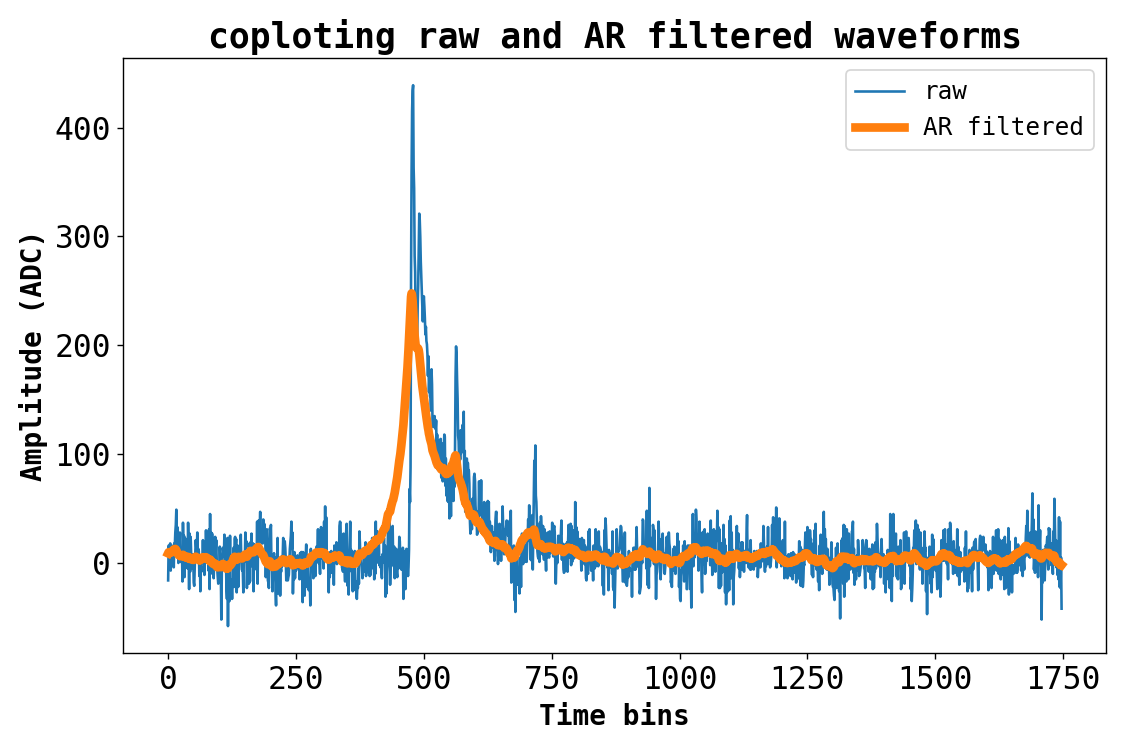

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('coploting raw and AR filtered waveforms')

event_value = 0

# plt.plot(fit_dict_52['ch0']['wf_ch0'][event_value], label='raw + shift')
plt.plot(fit_dict_52['ch0']['wf_raw'][event_value], label='raw')
plt.plot(fit_dict_52['ch0']['filtered_wf_ch0'][event_value], linewidth=5, label='AR filtered')
plt.xlabel('Time bins')
plt.ylabel('Amplitude (ADC)')
# plt.axhline(y=fit_dict_52['ch0']['fit_param'][event_value][4], color='magenta', label = 'baseline')
plt.legend()

In [ ]:
# plt.savefig('../plots/raw_vs_filtered.svg')

In [ ]:
# fit_dict_52['ch0']['fit_param'].loc[plot_index][0] < 600

Text(0, 0.5, 'Amplitude (ADC)')

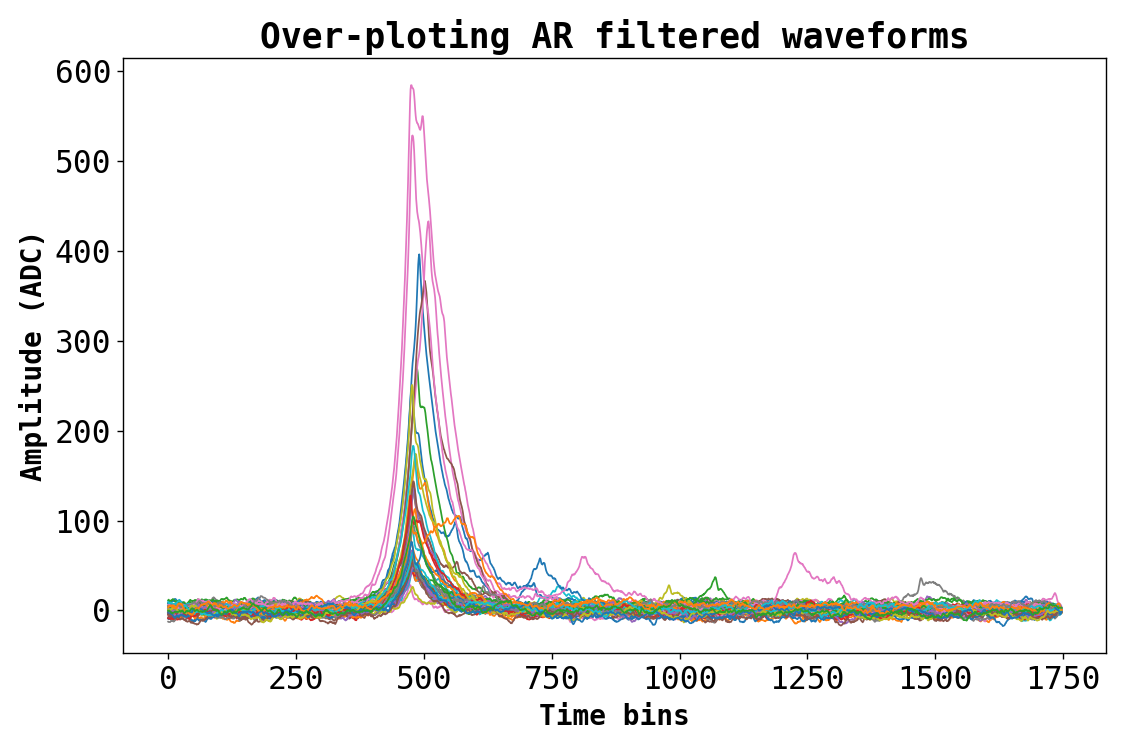

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Over-ploting AR filtered waveforms')

event_value = 0

for plot_index in fit_catalogue[ch_x]['wf_raw'].index.values[:50]:
    if (fit_dict_52['ch0']['fit_param'].loc[plot_index][0] < 600) & (fit_dict_52['ch0']['fit_param'].loc[plot_index][0] > 400):
        plt.plot(fit_dict_52['ch0']['filtered_wf_ch0'][plot_index], linewidth=1)
plt.xlabel('Time bins')
plt.ylabel('Amplitude (ADC)')
# plt.savefig('../plots/over_ploting_filtered_Wf.svg')

In [ ]:
del fit_dict_52

# 6. <a id='toc6_'></a>[Data Cleaning](#toc0_)

Drop NA rows

In [ ]:
for ch_index in ch_str_ls:
    fit_catalogue[ch_index] = fit_catalogue[ch_index].dropna()

In [ ]:
# sanity check: dropna works!
# fit_catalogue['ch0']['fit_param'].isnull().sum()

# 7. <a id='toc7_'></a>[Extract fit_param into dict](#toc0_)

extracting param values

In [ ]:
param_dict = {}
for ch_index in ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_index].index.values:
        loop_fit_param = fit_catalogue[ch_index].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict[ch_index] = fit_param_x

# 8. <a id='toc8_'></a>[Investigating Paramater distributions](#toc0_)

## 8.1. <a id='toc8_1_'></a>[t0](#toc0_)

/tmp/ipykernel_2596104/3830223704.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots()


Text(0.5, 1.0, 't0')

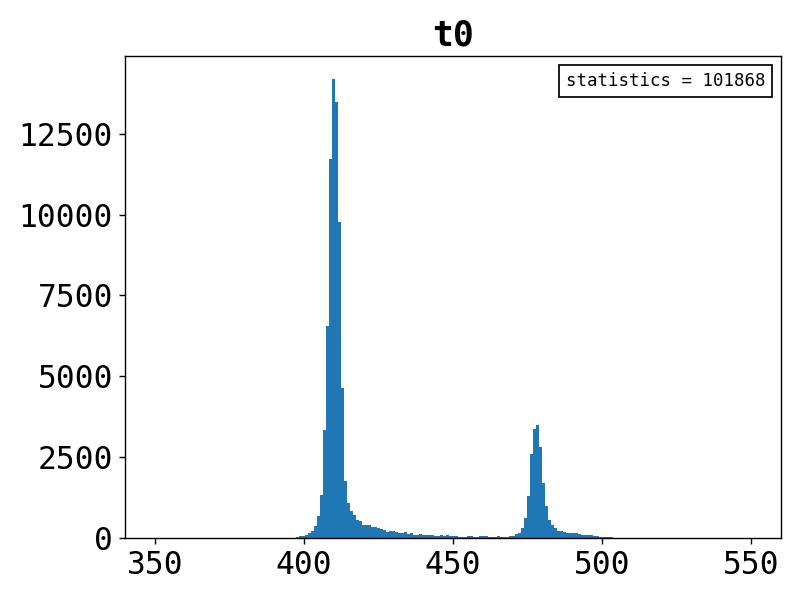

In [ ]:
plt.close(1)
fig1, ax1 = plt.subplots()
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax1.add_artist(text_in_box)
ax1.hist(param_dict[ch_x]['t0'], bins = np.linspace(350, 550, 200))
ax1.set_title('t0')

## 8.2. <a id='toc8_2_'></a>[$\sigma$](#toc0_)

Text(0.5, 1.0, '$\\sigma$')

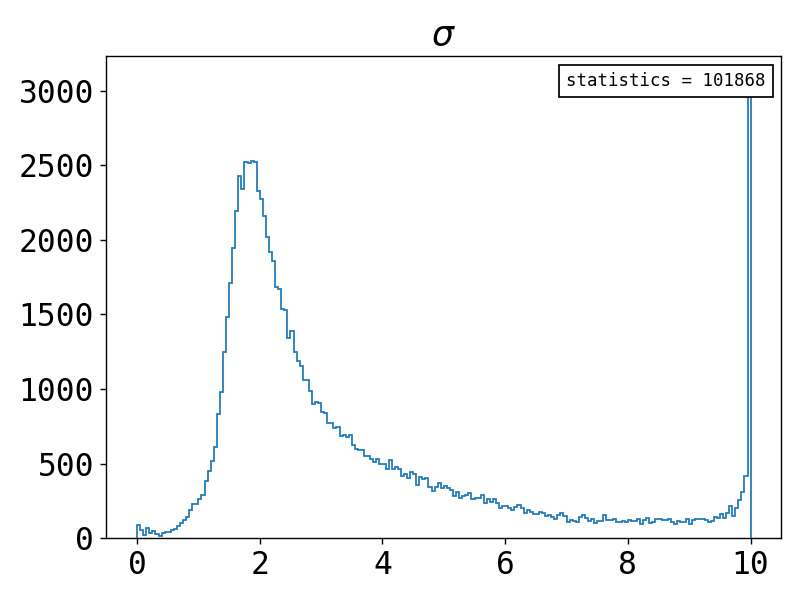

In [ ]:
plt.close(2)
fig2, ax2 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax2.hist(param_dict[ch_x]['sigma'], bins=200, histtype='step', label = 'data') #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['sigma'])}", \
                                       loc='upper right')
ax2.add_artist(text_in_box)
ax2.set_title('$\\sigma$')

### 8.2.1. <a id='toc8_2_1_'></a>[fitting](#toc0_)

In [ ]:
x_range = range(30, 49)

p0_input = [2, 0.45, 500.0] ## ch2 & ch1

# bounds_input = ([1.0, 0.0, 500.0], [10.0, 1.0, 600.0]) ## ch2
bounds_input = ([1.0, 0.0, 0.0], [10.0, 1.0, np.inf]) ## ch1

fitted_parameters, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            bounds = bounds_input,
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            )

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters), fitted_parameters
    )

ax2.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters), 
        #  color='red', 
         label='fitted function')
ax2.legend()
chisqr_in_box = AnchoredText(f"red. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')
ax2.add_artist(chisqr_in_box)

chisqr_value

7.30030054492982

In [ ]:
fitted_parameters

array([     1.853,     0.5026,       3061])

In [ ]:
legend_obj_ax2 = ax2.legend(loc='best', bbox_to_anchor=[1.0, 0.90])

In [ ]:
# legend.DraggableLegend(legend_obj_ax2)

In [ ]:
# pickle.dump( (fig2, ax2), open('ax2_plot.pkl', 'wb')) ## writes plot to file

## 8.3. <a id='toc8_3_'></a>[$\tau$](#toc0_)

Text(0.5, 1.0, '$\\tau$')

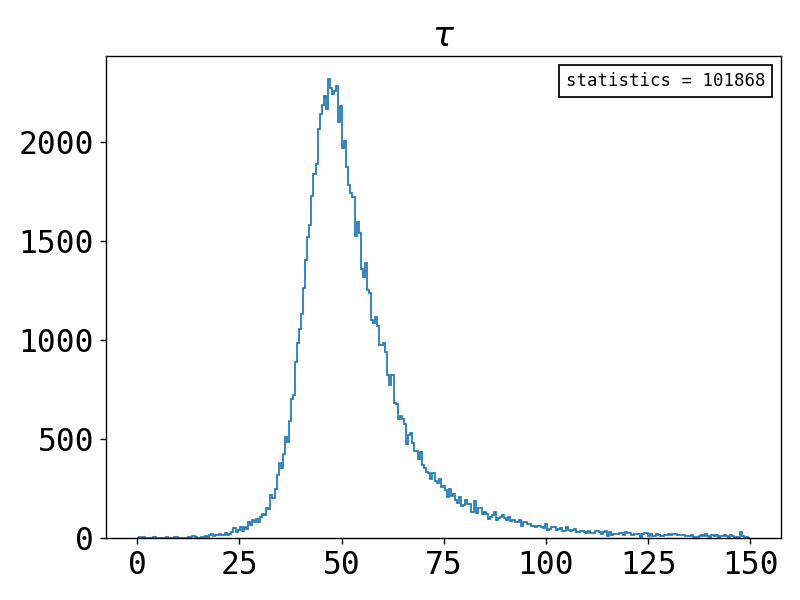

In [ ]:
plt.close(3)
fig3, ax3 = plt.subplots()
ax3.hist = plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 300), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax3.add_artist(text_in_box)
ax3.set_title('$\\tau$')

## 8.4. <a id='toc8_4_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'scale')

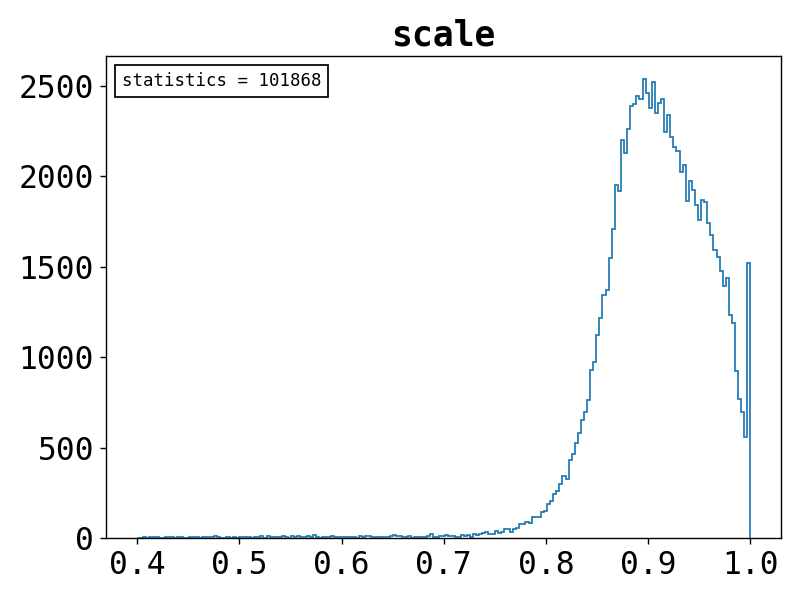

In [ ]:
plt.close(4)
fig4, ax4 = plt.subplots()
ax4.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 200), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax4.add_artist(text_in_box)
ax4.set_title('scale')

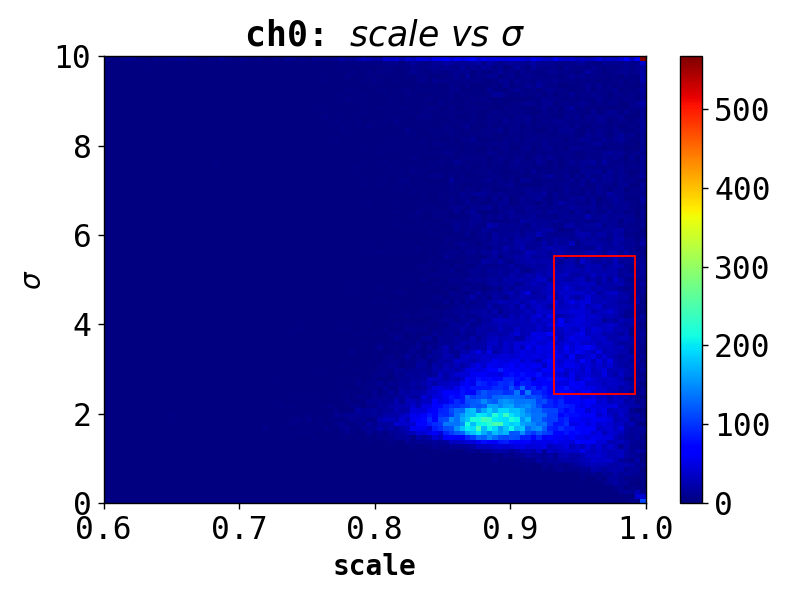

In [ ]:
plt.close(5)

red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')
fig5, ax5 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax5.hist2d(param_dict[ch_x]['scale'], \
                    param_dict[ch_x]['sigma'], bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], \
                    cmap='jet')
ax5.add_patch(red_win)
ax5.set_xlabel('scale')
ax5.set_ylabel('$\sigma$')
fig5.colorbar(hist_im)
ax5.set_title(f' {ch_x}: $scale\ vs \ \\sigma$');

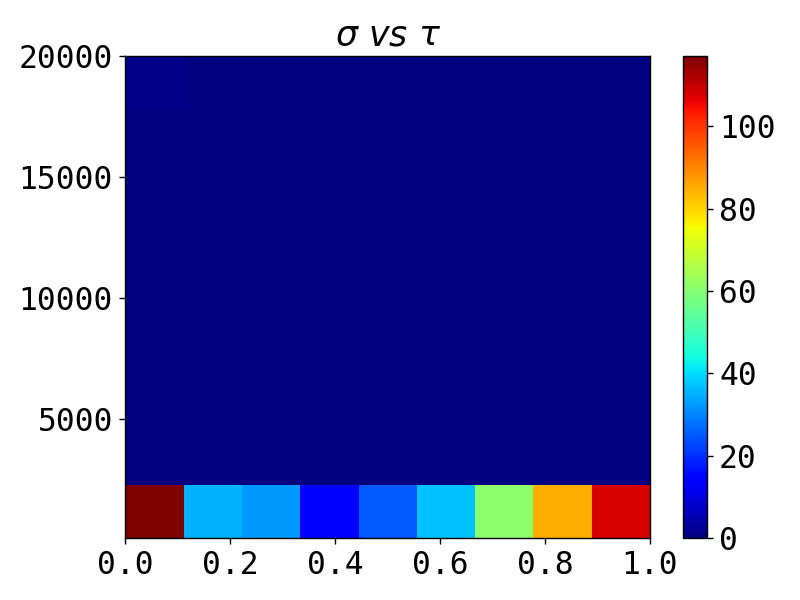

In [ ]:
plt.close(6)
fig6, ax6 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax6.hist2d(param_dict[ch_x]['sigma'], \
                    param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , \
                        cmap='jet')
fig6.colorbar(hist_im)
ax6.set_title('$\\sigma \ vs \ \\tau $');

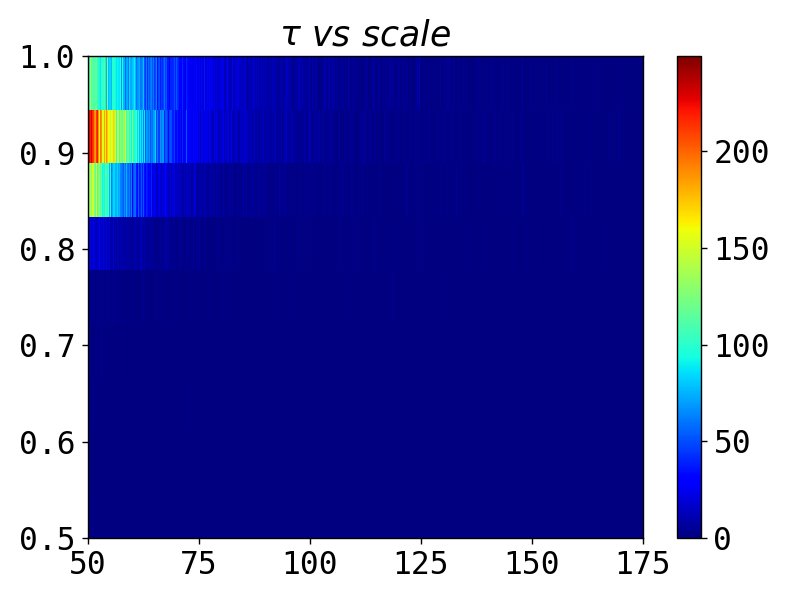

In [ ]:
plt.close(7)
fig7, ax7 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax7.hist2d(param_dict[ch_x]['tau'], \
                    param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)], \
                    cmap='jet')
fig7.colorbar(hist_im)
ax7.set_title('$\\tau \ vs \ scale $');

# 9. <a id='toc9_'></a>[Cuts:  rectangular cut](#toc0_)

<span style='color:green'> List of events to be removed</span>

In [ ]:
### list of events which contribute to red window for Ch2
internal_points = []
for fit_index in fit_catalogue[ch_x].index.values:
    loop_fit_param = fit_catalogue[ch_x]['fit_param'].loc[fit_index]
    param_point = (loop_fit_param[3], loop_fit_param[1]) # scale, sigma
    transformed_interior_point = red_win.get_data_transform().transform(param_point)
    if red_win.contains_point(transformed_interior_point, radius=0):
        internal_points.append(fit_index)

<span style = 'color:green'> Exploratory Analysis on red window: </span>

In [ ]:
internal_points;

In [ ]:
all_indices = fit_catalogue[ch_x].index.values

In [ ]:
all_indices[1000] in internal_points

False

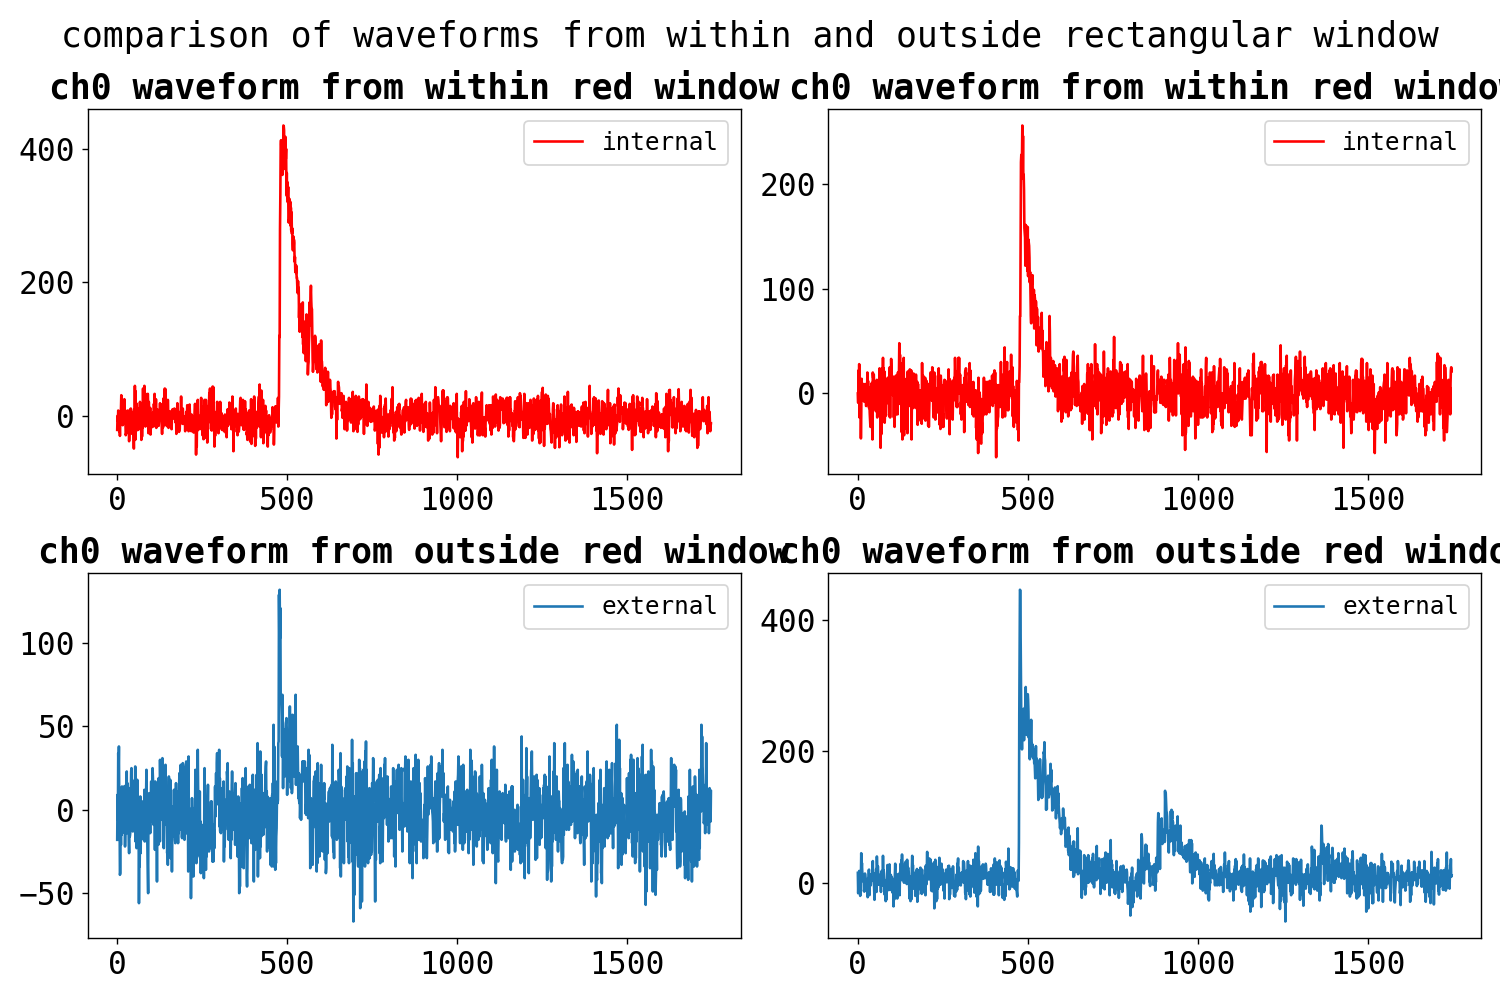

In [ ]:
fig555, ax555 = plt.subplots(2, 2, figsize=(12, 8))

selected_internal_wf = fit_catalogue[ch_x]['wf_raw'][internal_points[20]]

ax555[0][0].plot(selected_internal_wf, label = 'internal', color='red')
ax555[0][0].set_title(f"{ch_x} waveform from within red window")

selected_internal_wf = fit_catalogue[ch_x]['wf_raw'][internal_points[999]]

ax555[0][1].plot(selected_internal_wf, label = 'internal', color='red')
ax555[0][1].set_title(f"{ch_x} waveform from within red window")

selected_external_wf = fit_catalogue[ch_x]['wf_raw'][all_indices[100]]

ax555[1][0].plot(selected_external_wf, label = 'external')
ax555[1][0].set_title(f"{ch_x} waveform from outside red window")

selected_external_wf = fit_catalogue[ch_x]['wf_raw'][all_indices[1000]]

ax555[1][1].plot(selected_external_wf, label = 'external')
ax555[1][1].set_title(f"{ch_x} waveform from outside red window")

ax555[0][0].legend()
ax555[0][1].legend()
ax555[1][0].legend()
ax555[1][1].legend()

fig555.suptitle("comparison of waveforms from within and outside rectangular window")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.50)
# fig555.tight_layout()
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
#                                        loc='upper right')
# ax555.add_artist(text_in_box)

<span style='color:green'> applying cut </span>

In [ ]:
fit_catalogue[ch_x] = fit_catalogue[ch_x].drop(index = internal_points)

<span style='color:green'> extracting param_dict out of DataFrames for all channels </span>

In [ ]:
param_dict_cut = {}
for ch_index in ch_str_ls:
# for ch_x in ['ch2']: #ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_index].index.values:
        loop_fit_param = fit_catalogue[ch_index].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict_cut[ch_index] = fit_param_x

In [ ]:
# selected_channel = input("enter channel number")
ch_x = ch_str_ls[int(selected_channel)]
# ch_x = 'ch2'

Text(0.5, 1.0, 'ch0 t0: patch removed')

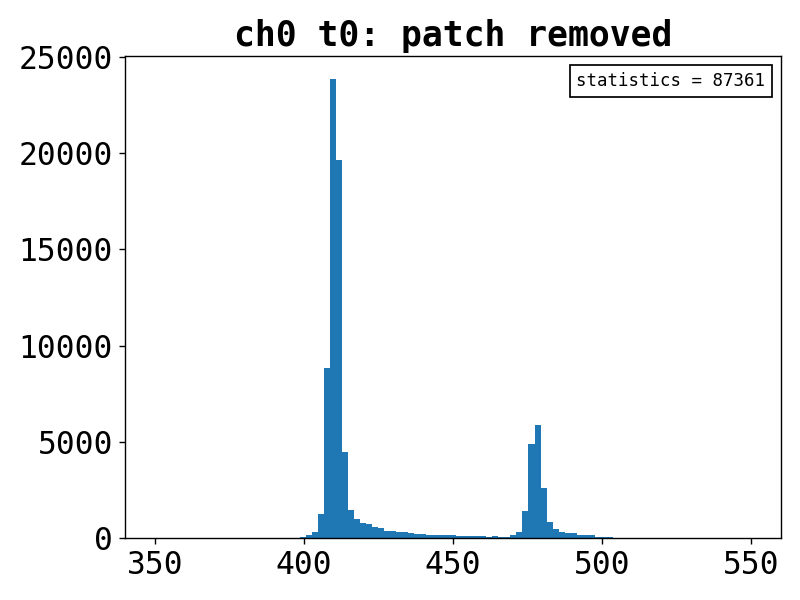

In [ ]:
plt.close(22)
fig22, ax22 = plt.subplots()
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
                                       loc='upper right')
ax22.add_artist(text_in_box)
ax22.hist(param_dict_cut[ch_x]['t0'], bins = np.linspace(350, 550, 100))
ax22.set_title(f"{ch_x} t0: patch removed")

## 9.1. <a id='toc9_1_'></a>[$ \sigma$](#toc0_)

<ErrorbarContainer object of 3 artists>

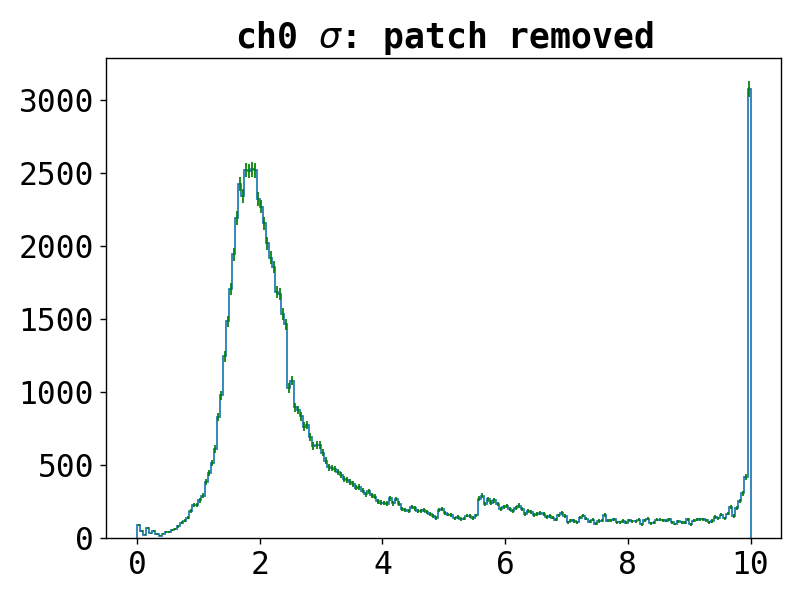

In [ ]:
plt.close(23)
fig23, ax23 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax23.hist(param_dict_cut[ch_x]['sigma'], bins=200, histtype='step', label='sigma') #, bins= np.linspace(1.0, 6.0, 10))
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])}", \
                                    #    loc='lower right')
# ax23.add_artist(text_in_box)
ax23.set_title(f"{ch_x} $\\sigma$: patch removed")
## error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax23.errorbar(hist_centers[:hist_content.shape[0]], hist_content, \
              yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

### 9.1.1. <a id='toc9_1_1_'></a>[fitting](#toc0_)

In [ ]:
# x_range # ch1 & ch2
# x_range = [range(24, 40), range(30, 49), range(30, 49)][selected_channel] ##ch0
x_range = [range(24, 40), range(24, 41), range(30, 49)][selected_channel]

p0_input = [2, 0.45, 500.0]
bounds_input = ([1.50, 0.0, 0.0], [2.15, 1.0, np.inf])

fitted_parameters_sigma, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            bounds = bounds_input,
                            )

ax23.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_sigma), \
          color='red', label='fitted function')

ax23.legend()

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_sigma), fitted_parameters_sigma
    )

text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')
ax23.add_artist(text_in_box)

fitted_parameters_sigma

array([       1.8,       0.33,       2129])

## 9.2. <a id='toc9_2_'></a>[$\tau$](#toc0_)

<ErrorbarContainer object of 3 artists>

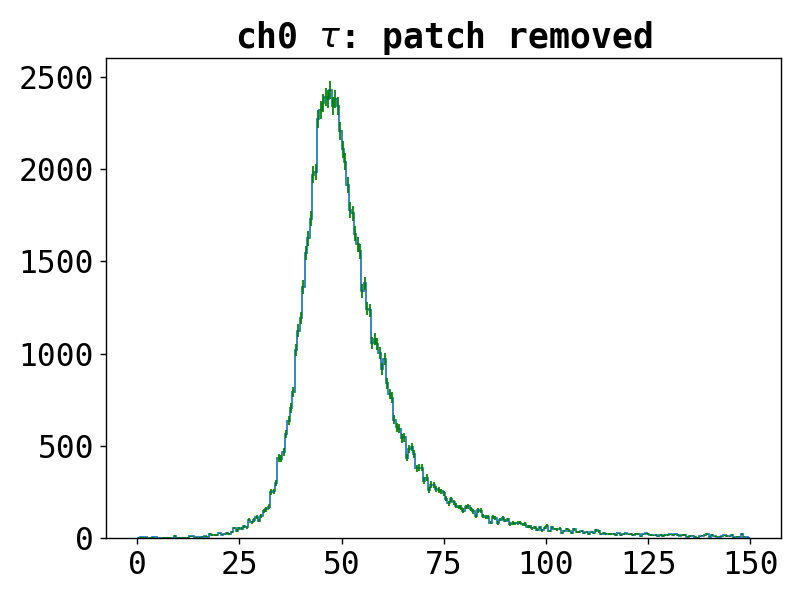

In [ ]:
# ch_x = 'ch2'
plt.close(24)
fig24, ax24 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax24.hist(param_dict_cut[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 250), histtype='step')
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])}", \
#                                        loc='upper right')
# ax24.add_artist(text_in_box)
ax24.set_title(f"{ch_x} $\\tau$: patch removed")

##error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax24.errorbar(hist_centers[:hist_content.shape[0]], hist_content, yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

### 9.2.1. <a id='toc9_2_1_'></a>[fitting](#toc0_)

In [ ]:
# x_range = range(58, 91) # ch0,1,2
x_range = range(58, 73) # ch0

p0_input = [50.0, 9.0, 8000.0] # ch1 & ch2
# bounds_input = ([20.0, 0.05, 1.0], [60.0, 15.5, 10_000]) ## ch2
bounds_input = ([20.0, 0.05, 1.0], [60.0, 15.5, np.inf]) ## ch0,1,2

fitted_parameters_tau, _pcov = curve_fit(f_gauss, \
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, \
                            bounds = bounds_input, \
                            sigma = np.sqrt(hist_content[x_range]), \
                            absolute_sigma=True, \
                            # x_scale = [10, 1, 1000], \
                            method = 'trf', \
                            ## method = 'dogbox', \
                            )

### plotting
ax24.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_tau), color='red', label='fitted function')
# ax24.legend(loc='upper right')

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_tau), fitted_parameters_tau
    )

text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')

ax24.add_artist(text_in_box)
fitted_parameters_tau

array([      48.2,      6.856,  4.474e+04])

### 9.2.2. <a id='toc9_2_2_'></a>[Fitting with iMinuit](#toc0_)
Only used for verifying scipy fitter

In [ ]:
# import iminuit
# from iminuit.cost import LeastSquares
# from iminuit import Minuit

In [ ]:
# least_squares = LeastSquares(x_values[58:91], hist_content[58:91], np.sqrt(hist_content[58:91]), f_gauss)
# # least_squares = LeastSquares(x_values, hist_content[:x_values.shape[0]], np.ones(x_values.shape[0]), f_gauss)

In [ ]:
# m_obj = Minuit(least_squares, g_mean = 50.0, g_sigma = 9.5, g_k = 8000)

In [ ]:
# m_obj.simplex()

In [ ]:
# m_obj.migrad()

## 9.3. <a id='toc9_3_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'ch0 scale: patch removed')

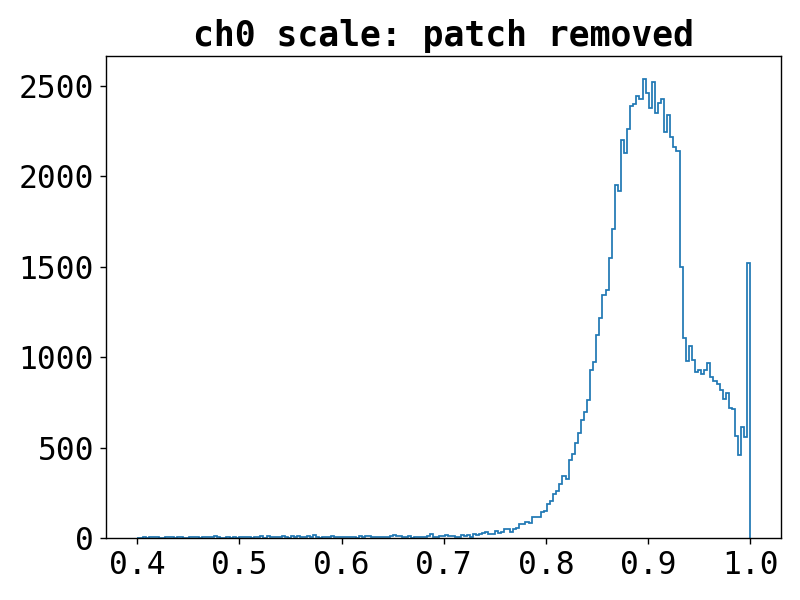

In [ ]:
# ch_x = 'ch2'
plt.close(25)
fig25, ax25 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax25.hist(param_dict_cut[ch_x]['scale'], \
                                                bins= np.linspace(0.4, 1.0, 200), histtype='step', label='data')
# text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])}", \
#                                        loc='upper left')
# ax25.add_artist(text_in_box)
ax25.set_title(f"{ch_x} scale: patch removed")

### 9.3.1. <a id='toc9_3_1_'></a>[fitting](#toc0_)

In [ ]:
# x_range = [range(153, 172), range(130, 172), range(130, 172)][selected_channel] #range(130, 177) 160 165 # ch2
x_range = [range(157, 169), range(138, 157), range(130, 172)][selected_channel]

## x_range = range(153, 172) # ch0
p0_input = [0.89, 0.09, 200.0]
bounds_input = ([0.8, 0.01, 1.0], [1.0, 1.0, 10_000])

fitted_parameters_scale, _pcov = curve_fit(f_gauss, \
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, \
                            bounds = bounds_input, \
                            sigma = np.sqrt(hist_content[x_range]), \
                            absolute_sigma=True, \
                            # x_scale = [10, 1, 1000], \
                            method = 'trf', \
                            ## method = 'dogbox', \
                            )
##error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax25.errorbar(hist_centers[:hist_content.shape[0]], hist_content, \
              yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')
### plotting
ax25.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_scale), \
          color='red', label='fitted function')
ax25.axvline(x = 0.9026)
# ax25.legend(loc='lower left')

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_scale), fitted_parameters_scale
    )

print(f'chisqr_value: {chisqr_value}')
print(f'fitted_parameters_scale: {fitted_parameters_scale}')

text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])} \nred. chisqr = {chisqr_value:.2f}", \
                                       loc='center left')

ax25.add_artist(text_in_box)

chisqr_value: 1.669007651558048
fitted_parameters_scale: [    0.8957    0.04102      254.2]


2d parameter space 

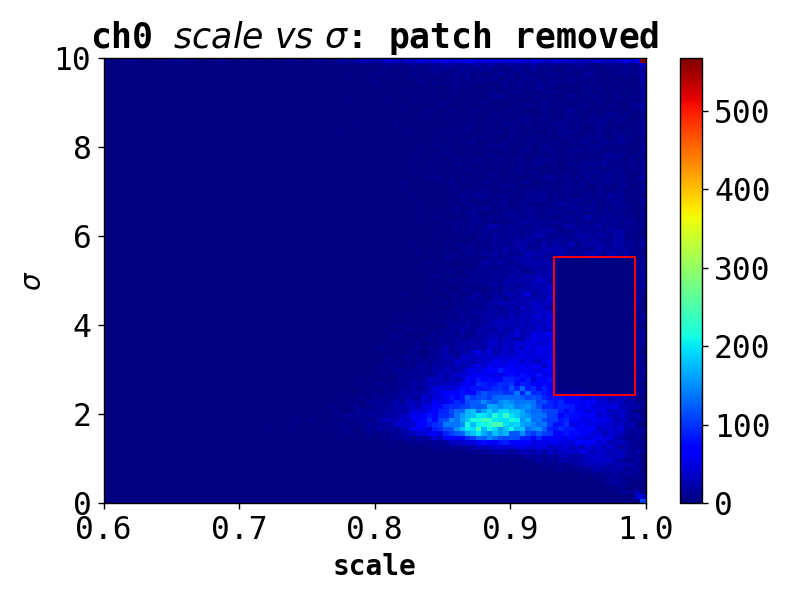

In [ ]:
# ch_x = 'ch2'
plt.close(26)
fig26, ax26 = plt.subplots()
red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')

hist_h, hist_xedges, hist_yedges, hist_im = ax26.hist2d(param_dict_cut[ch_x]['scale'], param_dict_cut[ch_x]['sigma'], \
           bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
ax26.add_patch(red_win)
ax26.set_xlabel('scale')
ax26.set_ylabel('$\sigma$')
fig26.colorbar(hist_im)
ax26.set_title(f"{ch_x} $scale\ vs \ \\sigma$: patch removed");

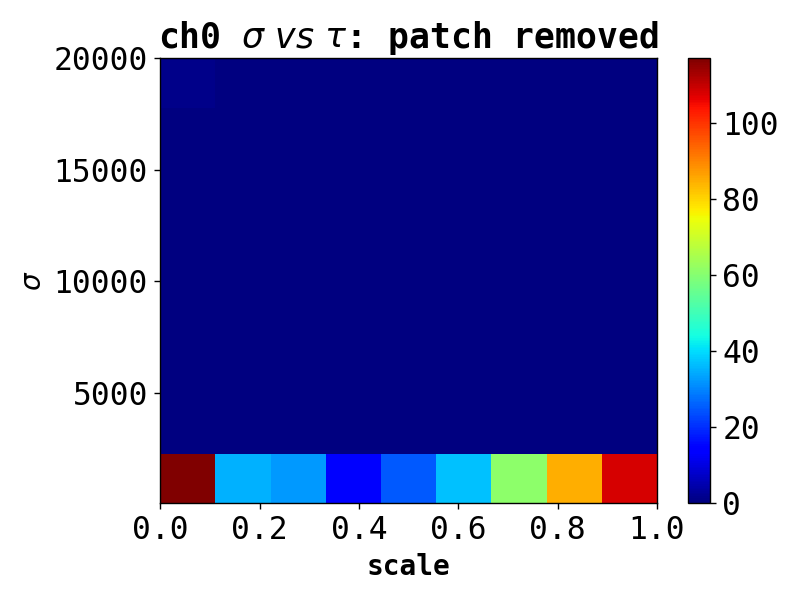

In [ ]:
# ch_x = 'ch2'
plt.close(27)
fig27, ax27 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax27.hist2d(param_dict_cut[ch_x]['sigma'], param_dict_cut[ch_x]['tau'], \
           bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
ax27.set_xlabel('scale')
ax27.set_ylabel('$\sigma$')
fig27.colorbar(hist_im)
ax27.set_title(f"{ch_x} $\\sigma \ vs \ \\tau $: patch removed");

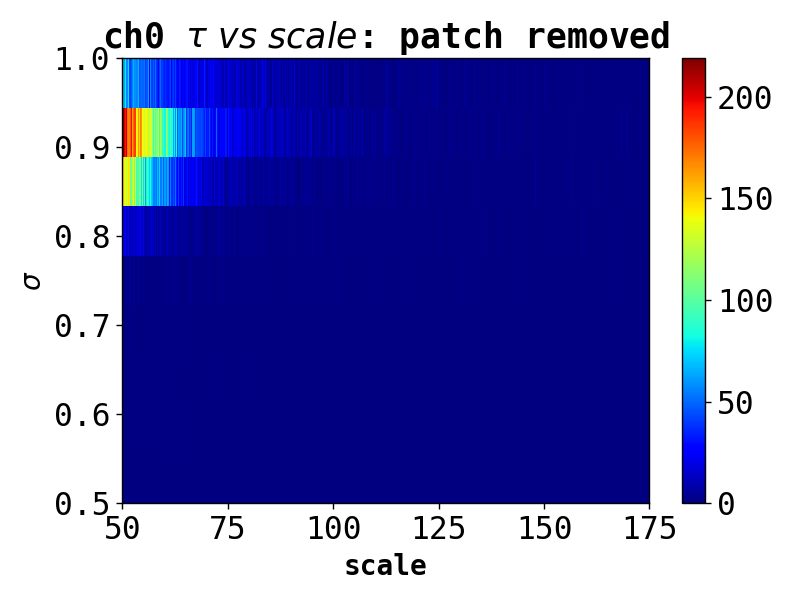

In [ ]:
# ch_x = 'ch2'
plt.close(28)
fig28, ax28 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax28.hist2d(param_dict_cut[ch_x]['tau'], \
            param_dict_cut[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] ,\
            cmap='jet')

ax28.set_xlabel('scale')
ax28.set_ylabel('$\sigma$')
fig28.colorbar(hist_im)
ax28.set_title(f"{ch_x} $\\tau \ vs \ scale $: patch removed");

# 10. <a id='toc10_'></a>[FingerPlot](#toc0_)

In [ ]:
fit_catalogue['ch0'] #TODO invetigate

,event_counter,wf_ch0,wf_raw,filtered_wf_ch0,fit_param,chisqr
0,13.0,"[42.0, 74.0, 71.0, 65.0, 76.0, 51.0, 62.0, 61....","[-16.0, 16.0, 13.0, 7.0, 18.0, -7.0, 4.0, 3.0,...","[8.864692195512953, 9.86072103699266, 9.644917...","[476.3364806510814, 2.2653064623586343, 68.373...",5.229966
3,79.0,"[113.0, 97.0, 114.0, 115.0, 112.0, 113.0, 115....","[55.0, 39.0, 56.0, 57.0, 54.0, 55.0, 57.0, 40....","[90.23173263517612, 91.83722149497513, 94.1362...","[67.00055658690563, 6.52517521480628, 67.01008...",14.035644
4,89.0,"[93.0, 37.0, 65.0, 97.0, 60.0, 86.0, 73.0, 50....","[36.0, -20.0, 8.0, 40.0, 3.0, 29.0, 16.0, -7.0...","[3.4472769665016347, 2.1809135067725367, 3.055...","[476.77589990584534, 1.5328653243715287, 55.76...",5.009394
5,164.0,"[59.0, 54.0, 45.0, 49.0, 59.0, 41.0, 59.0, 40....","[2.0, -3.0, -12.0, -8.0, 2.0, -16.0, 2.0, -17....","[-8.607810950713601, -9.04480307366, -9.304169...","[477.3596476627071, 2.6850373213116434, 48.543...",4.872091
6,165.0,"[46.0, 71.0, 61.0, 87.0, 88.0, 72.0, 79.0, 55....","[-13.0, 12.0, 2.0, 28.0, 29.0, 13.0, 20.0, -4....","[7.6780915710064095, 8.507178719798343, 8.3916...","[477.0000229167873, 2.89719456003637, 68.02144...",4.629526
...,...,...,...,...,...,...
102110,99983.0,"[30.0, 22.0, 42.0, 37.0, 52.0, 42.0, 62.0, 35....","[-23.0, -31.0, -11.0, -16.0, -1.0, -11.0, 9.0,...","[-0.6626006556778268, 0.2106243170022637, 1.43...","[405.99998915164514, 6.015212965800255, 46.483...",4.672340
102111,99991.0,"[57.0, 66.0, 37.0, 34.0, 70.0, 57.0, 76.0, 69....","[3.0, 12.0, -17.0, -20.0, 16.0, 3.0, 22.0, 15....","[4.34205086840273, 4.405469654586177, 4.119030...","[411.4259972538404, 1.9945884727352345, 36.786...",5.184946
102112,99993.0,"[47.0, 65.0, 40.0, 79.0, 70.0, 56.0, 52.0, 43....","[-13.0, 5.0, -20.0, 19.0, 10.0, -4.0, -8.0, -1...","[-3.985901972323431, -3.6428145545035746, -3.9...","[410.0000738306951, 1.601618242968305, 53.3746...",5.000655
102113,99997.0,"[51.0, 73.0, 17.0, 61.0, 49.0, 61.0, 39.0, 42....","[2.0, 24.0, -32.0, 12.0, 0.0, 12.0, -10.0, -7....","[1.3976655191908112, 1.3775682491570946, 0.494...","[407.0000486311379, 4.237400862545725, 55.8507...",5.863975


In [ ]:
fit_catalogue[ch_x][(fit_catalogue[ch_x]['chisqr']<2)] #TODO investigate
## almost all events have reduced chisqr > 2. Why? What does this chisqr look like for ch1 and ch2.

,event_counter,wf_ch0,wf_raw,filtered_wf_ch0,fit_param,chisqr
850,20306.0,"[223.0, 248.0, 274.0, 246.0, 246.0, 243.0, 203...","[-23.0, 2.0, 28.0, 0.0, 0.0, -3.0, -43.0, 1.0,...","[-1.433834939776028, -0.5927447289333628, -0.6...","[476.00006471537387, 1.3453531702648318, 44.85...",1.658237


In [ ]:
# ### This integrating window size is not in use.
# # pulse_integration_window_begin = 450
# # pulse_integration_window_end = 650

# integration_vector = np.array([])

# for wf_index in fit_catalogue[ch_x]['wf_raw'].index.values:
#     # if fit_catalogue[ch_x]['chisqr'].loc[wf_index] < 2.0:
#     if True:
#         fitted_param = fit_catalogue[ch_x]['fit_param'][wf_index]
#         fitted_baseline = fitted_param[4]
#         # trace = fit_catalogue[ch_x]['wf_raw'].loc[wf_index] - fitted_baseline
#         trace = fit_catalogue[ch_x][f'filtered_wf_{ch_x}'].loc[wf_index] - fitted_baseline
#         peak_loc =  int(fitted_param[0])
#         # pulse_win_integration_value = np.sum(trace[pulse_integration_window_begin:pulse_integration_window_end]) # fixed window
#         pulse_win_integration_value = np.sum(trace[peak_loc-10:peak_loc+50]) # asymmetric window around peak
#         integration_vector = np.append(integration_vector, pulse_win_integration_value)

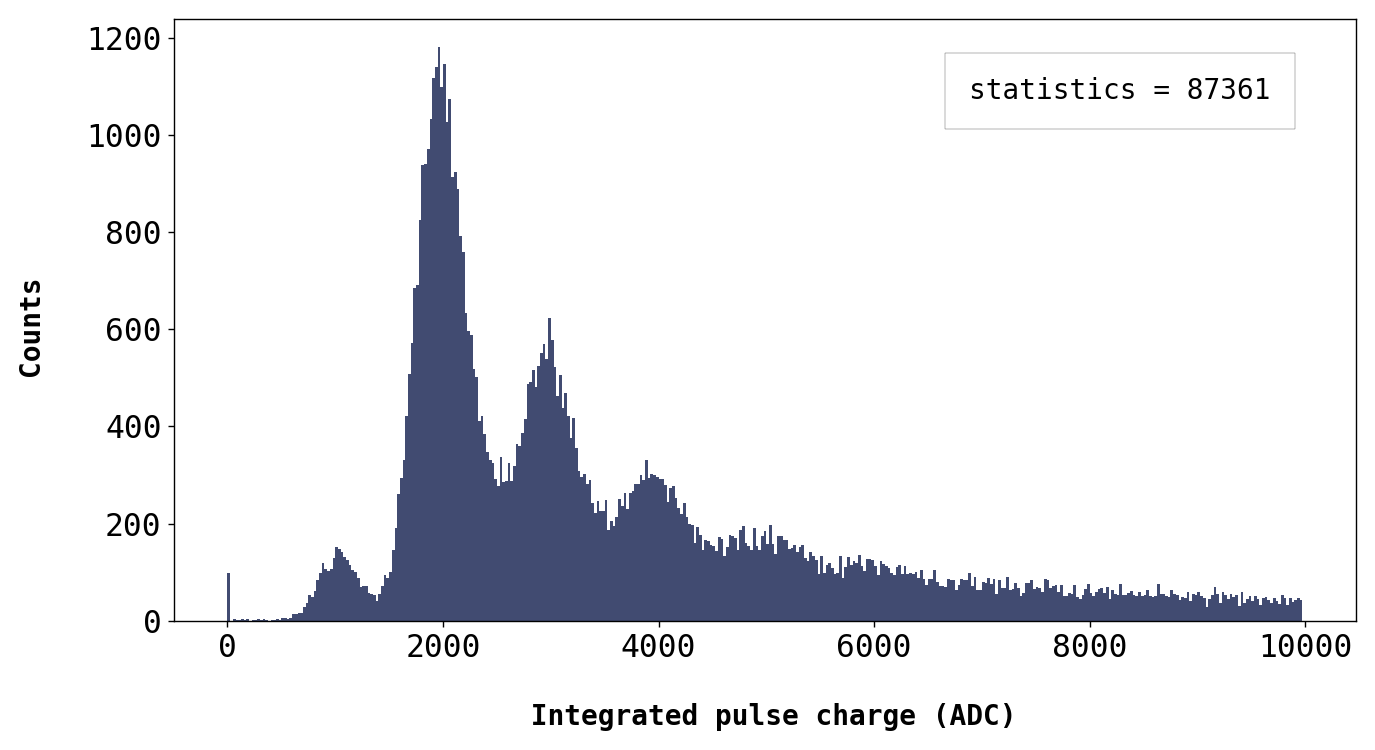

In [ ]:
# fig99, ax99 = plt.subplots( figsize=(11, 6))
# # hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 2500, 10), color='#B5D9C0', label=ch_x); # peak_loc works for ch1
# # hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 10000, 25), color='#414B71', label=ch_x); # peak_loc works for ch0
# hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 10000, 25), color='#414B71', label=ch_x); # peak_loc works for ch0
# # hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 2000, 20), color='#AC7774', label='ch2');
# # ax99.set_title(f'Finger plot for {ch_x} \n', fontsize=16)
# ax99.set_xlabel('\n Integrated pulse charge (ADC)')
# ax99.set_ylabel('Counts \n')
# # ax99.legend(bbox_to_anchor=(1.0, 1.0))
# txt_box = offsetbox.TextArea(f"statistics = {len(integration_vector)}", textprops=dict(color='black', backgroundcolor='white', size=16))
# annotation_box_artist = offsetbox.AnnotationBbox(
#                         txt_box, (0.80, 0.88), frameon=True, pad=0.1, xycoords='axes fraction', 
#                         bboxprops=dict(edgecolor='#2D2D2D', linewidth=0.2, boxstyle="square, pad=1.0")
#                         )
# ax99.add_artist(annotation_box_artist)
# # fig99.savefig('../plots/fingerplot_from_flt_ch0.svg')

In [ ]:
# pulse_integration_window_begin = 450
# pulse_integration_window_end = 650

integration_vector = np.array([])

for wf_index in fit_catalogue[ch_x]['wf_raw'].index.values[:50000]:
    # if fit_catalogue[ch_x]['chisqr'].loc[wf_index] < 2.0:
    # if True:
    if (fit_catalogue['ch0']['fit_param'].loc[wf_index][0] < 600) & (fit_catalogue['ch0']['fit_param'].loc[wf_index][0] > 400):
        fitted_param = fit_catalogue[ch_x]['fit_param'][wf_index]
        fitted_baseline = fitted_param[4]
        # trace = fit_catalogue[ch_x]['wf_raw'].loc[wf_index] - fitted_baseline
        trace = fit_catalogue[ch_x][f'filtered_wf_{ch_x}'].loc[wf_index] - fitted_baseline
        # trace = fit_catalogue[ch_x][f'filtered_wf_{ch_x}'].loc[wf_index] # experimenting
        peak_loc =  int(fitted_param[0])
        # pulse_win_integration_value = np.sum(trace[pulse_integration_window_begin:pulse_integration_window_end]) # fixed window
        # pulse_win_integration_value = np.sum(trace[peak_loc-10:peak_loc+50]) # asymmetric window around peak
        # pulse_win_integration_value = np.sum(trace[peak_loc-20:peak_loc+20]) # specific to FilteredWF
        # pulse_win_integration_value = np.sum(trace[peak_loc-100:peak_loc+100])
        pulse_win_integration_value = np.sum(trace[peak_loc-112:peak_loc+112])
        integration_vector = np.append(integration_vector, pulse_win_integration_value)

In [ ]:
# fit_catalogue['ch0']

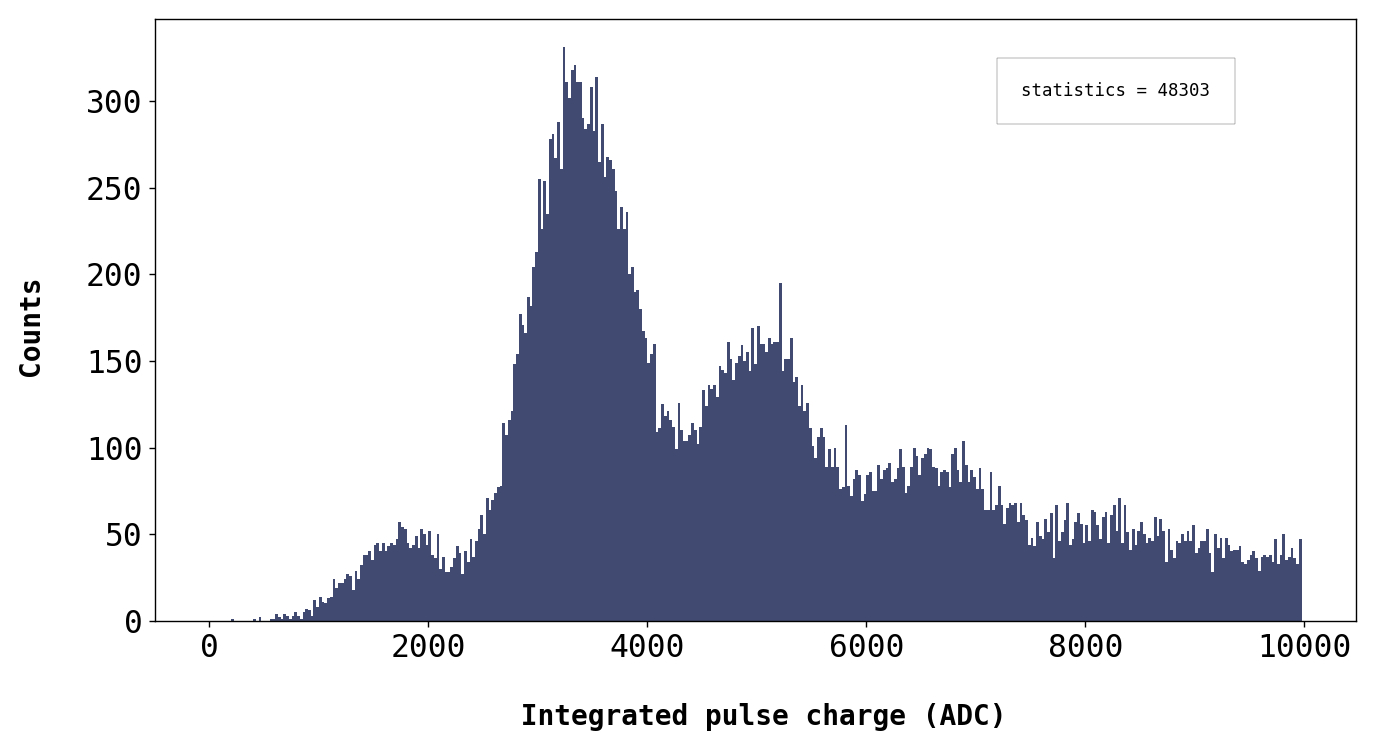

In [ ]:
fig100, ax100 = plt.subplots( figsize=(11, 6))
# fig100, ax100 = plt.subplots( figsize=(6, 4))
# hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 2500, 10), color='#B5D9C0', label=ch_x); # peak_loc works for ch1
hist_content, hist_edges, _hist_obj = ax100.hist(integration_vector, bins=np.arange(0, 10000, 25), color='#414B71', label=ch_x); # peak_loc works for ch0
# hist_content, hist_edges, _hist_obj = ax100.hist(integration_vector, bins=np.arange(0, 8000, 15), color='#414B71', label=ch_x); # peak_loc works for ch0
# hist_content, hist_edges, _hist_obj = ax99.hist(integration_vector, bins=np.arange(0, 2000, 20), color='#AC7774', label='ch2');
# ax100.set_title(f'Finger plot for {ch_x} \n', fontsize=16)
# ax100.set_xlabel('\n Integrated ADC counts')
# ax100.set_ylabel('Frequency \n')    
ax100.set_xlabel('\n Integrated pulse charge (ADC)')
ax100.set_ylabel('Counts \n')
# ax99.legend(bbox_to_anchor=(1.0, 1.0))
txt_box = offsetbox.TextArea(f"statistics = {len(integration_vector)}", textprops=dict(color='black', backgroundcolor='white'))
annotation_box_artist = offsetbox.AnnotationBbox(
                        txt_box, (0.80, 0.88), frameon=True, pad=0.1, xycoords='axes fraction', 
                        bboxprops=dict(edgecolor='#2D2D2D', linewidth=0.2, boxstyle="square, pad=1.0")
                        )
ax100.add_artist(annotation_box_artist)
# fig100.savefig('../plots/fingerplot_filteredWF_224p0_ch0.svg')

In [ ]:
# ax100.grid()

In [ ]:
ax100.grid()
## ax100.axvline(x = 2500, linestyle='--', alpha=0.5, color='grey')
## ax100.axvline(x = 4250, linestyle='--', alpha=0.5, color='magenta')
# ax100.axvline(x = 5725, linestyle='--', alpha=0.5, color='magenta')
ax100.axvline(x = 2250, linestyle='--', alpha=0.5, color='blue')
ax100.axvline(x = 4250, linestyle='--', alpha=0.5, color='blue')
ax100.axvline(x = 4450, linestyle='--', color='magenta', alpha=0.5)
ax100.axvline(x = 6000, linestyle='--', color='magenta', alpha=0.5)
## ax100.axhline(y = 123, linestyle='--', color='magenta', alpha=0.5,)

## ax100.legend(bbox_to_anchor=(1.0, 0.75))

In [ ]:
# fig100.savefig(f'../plots/fingerplotP_filteredWF_200p0_{ch_x}.png')

In [ ]:
# fig100.savefig(f'../plots/fingerplotP_filteredWF_224p0_fitfunc_{ch_x}.png')

# 11. <a id='toc11_'></a>[fit gaussian to finger](#toc0_)

## 11.1. <a id='toc11_1_'></a>[First finger](#toc0_)

In [ ]:
# np.where(hist_edges <= 4250)

In [ ]:
# hist_edges[90]

In [ ]:
# hist_edges[82]

In [ ]:
# x_range = range(85, 126) ## ch0 from default

# x_range = range(85, 133) ## ch0

# x_range = range(110, 155) ## filtered ch0
# x_range = range(97, 170) ## filtered ch0 window limit 175
# x_range = range(90, 150) ## filtered ch0 window limit 75
# x_range = range(80, 125) ## filtered ch0 window limit 50
# x_range = range(55, 75) ## filtered ch0 window limit 25
# x_range = range(92, 168) ## filtered ch0 window limit 125
# x_range = range(90, 172) ## filtered ch0 window limit 140
# x_range = range(100, 160) ## filtered ch0 window limit 162
x_range = range(94, 164) ## filtered ch0 window limit 112

# p0_input = [2500, 200, 1200.0] ## ch0
# p0_input = [3300, 425, 100000.0] ## ch0
# p0_input = [3300, 573, 100000.0] ## ch0 window limit 175

# p0_input = [3300, 350, 100000.0] ## ch0 window limit 75
# p0_input = [2500, 270, 100000.0] ## ch0 window limit 50
# p0_input = [1600, 190, 100000.0] ## ch0 window limit 25
p0_input = [3390, 500, 100000.0] ## ch0 window limit 112

bounds_input = ([1000.0, 0.0001, 0.0001], [np.inf, np.inf, np.inf]) ## ch0

fitted_parameters, pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input,
                            bounds = bounds_input,
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            )

red_chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters), fitted_parameters
    )

ax100.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters), color='red', label='first fit')

red_chisqr_value

1.0475592235027253

In [ ]:
fitted_parameters

array([      3399,      494.7,  3.801e+05])

In [ ]:
perr = np.sqrt(np.diag(pcov))
perr

array([     5.831,      5.747,       3697])

## 11.2. <a id='toc11_2_'></a>[Second finger](#toc0_)

In [ ]:
# np.where(hist_edges <= 2860)
# np.where(hist_edges <= 6000)
# hist_edges[178]
# hist_edges[240]

In [ ]:
# ax100.axhline(y=82.5, linestyle='--', color='magenta')

In [ ]:
# x_range = range(140, 164) ## ch0
# x_range = range(170, 230) ## filtered ch0
# x_range = range(155, 210) ## filtered ch0 window limit 75
# x_range = range(136, 182) ## filtered ch0 window limit 50
# x_range = range(85, 110) ## filtered ch0 window limit 25
# x_range = range(180, 232) ## filtered ch0 window limit 125
# x_range = range(180, 239) ## filtered ch0 window limit 140
# x_range = range(170, 240) ## filtered ch0 window limit 162
x_range = range(170, 229) ## filtered ch0 window limit 112
# x_range = range(170, 230) ## filtered ch0 window limit 112

# p0_input = [3750, 300, 100000.0] ## ch0
# p0_input = [5000, 627, 100000.0] ## filtered ch0
# p0_input = [5375.0, 437, 100000.0] ## filtered ch0 window limit 75
# p0_input = [3900.0, 322, 100000.0] ## filtered ch0 window limit 50
# p0_input = [2400.0, 200, 100000.0] ## filtered ch0 window limit 25
# p0_input = [5110.0, 460, 100000.0] ## filtered ch0 window limit 125
# p0_input = [5110.0, 460, 100000.0] ## filtered ch0 window limit 140
# p0_input = [5320.0, 460, 100000.0] ## filtered ch0 window limit 162
p0_input = [5000.0, 320, 100000.0] ## filtered ch0 window limit 112
bounds_input = ([1000.0, 0.0001, 0.0001], [np.inf, np.inf, np.inf]) ## ch0
fitted_parameters, pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input,
                            bounds = bounds_input,
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            )

red_chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters), fitted_parameters
    )

ax100.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters), color='green', linewidth=2.2, label='second fit')

red_chisqr_value

0.9672774505370582

In [ ]:
## standard deviation from covariance matrix
perr = np.sqrt(np.diag(pcov))
perr

array([     13.35,      23.71,       7009])

In [ ]:
fitted_parameters

array([      4963,      680.5,  2.713e+05])

In [ ]:
# how likely are these chisqr values?
# from scipy import stats
# stats.chi2.pdf(1.02 , 68)

# 12. <a id='toc12_'></a>[SPE charge](#toc0_)

In [ ]:
## ch0
## instruction: difference of means of first two peaks
# print(f"SPE charge: {3770 - 2517}") ### ch0 from default
# print(f"SPE charge: {1973 - 1316}") ### filtered ch0 from default
# print(f"SPE charge: {4872 - 3296}") ### filtered ch0 from default
# print(f"SPE charge: {4985 - 3480}") ### filtered ch0 from default +/- 150
# print(f"SPE charge: {4913 - 3553}") ### filtered ch0 from default +/- 175
# print(f"SPE charge: {4539 - 3072}") ### filtered ch0 from default +/- 75
# print(f"SPE charge: {3881 - 2595}") ### filtered ch0 from default +/- 50
# print(f"SPE charge: {2408 - 1603}") ### filtered ch0 from default +/- 25
# print(f"SPE charge: {5028 - 3442}") ### filtered ch0 from default +/- 125
# print(f"SPE charge: {5072 - 3490}") ### filtered ch0 from default +/- 140
# print(f"SPE charge: {4989 - 3523}") ### filtered ch0 from default +/- 162
# print(f"SPE charge: {4941 - 3381}") ### filtered ch0 from default +/- 112
print(f"SPE charge: { 4963 - 3399}") ### filtered ch0 from default +/- 112

SPE charge: 1564


In [ ]:
## error in SPE charge using error propagation
# f"Error: {np.sqrt((3.377)**2 + (5.697)**2)}"
# f"Error: {np.sqrt((1.305)**2 + (2.094)**2)}"  ### filtered ch0
# f"Error: {np.sqrt((6.511)**2 + (12.48)**2)}"  ### filtered ch0
# f"Error: {np.sqrt((14.13)**2 + (34.38)**2)}"  ### filtered ch0 +/- 150
# f"Error: {np.sqrt((8.845)**2 + (51.08)**2)}"  ### filtered ch0 +/- 175
# f"Error: {np.sqrt((3.91)**2 + (8.693)**2)}"  ### filtered ch0 +/- 75
# f"Error: {np.sqrt((2.955)**2 + (6.027)**2)}"  ### filtered ch0 +/- 50
# f"Error: {np.sqrt((2.001)**2 + (2.995)**2)}"  ### filtered ch0 +/- 25
# f"Error: {np.sqrt((6.003)**2 + (17.78)**2)}"  ### filtered ch0 +/- 125
# f"Error: {np.sqrt((6.418)**2 + (21.98)**2)}"  ### filtered ch0 +/- 140
# f"Error: {np.sqrt((12.52)**2 + (30.43)**2)}"  ### filtered ch0 +/- 162
# f"Error: {np.sqrt((5.515)**2 + (12.35)**2)}"  ### filtered ch0 +/- 112
f"Error: {np.sqrt((5.831)**2 + (13.35)**2)}"  ### filtered ch0 +/- 112

'Error: 14.567877710909025'

# 13. <a id='toc13_'></a>[SNR](#toc0_)

In [ ]:
## instruction Signal to Noise Ration (SNR) given by that SPE charge divided by Gaussian sigma of the first peak. First peak = pedestal?
## since we only have access to the second peak, you can use instead its sigma, divided by sqrt(2)
## (this is because sigma of a convolution of two identical gauss distributions is sqrt(2 * sigma^2) ) ## convolution of which distributions? why convolution?

In [ ]:
# SPE_charge = 1253
# sigma_1 = 241.3
# SNR = SPE_charge/(sigma_1/np.sqrt(2))

# SPE_charge = 1576
# sigma_1 = 454.8

SPE_charge = 1564
sigma_1 = 494.7
SNR = SPE_charge/(sigma_1/np.sqrt(2))

f"SNR: {SNR:.2f}"

'SNR: 4.47'

<hr style="border: none; border-bottom: 5px solid blue;"> </hr>